In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from matplotlib import pyplot as plt

import time
from sklearn import linear_model

from sklearn.model_selection import train_test_split

In [3]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load Dataset

In [4]:
#Loaddataset
df = pd.read_excel("/content/drive/MyDrive/DatasetHackathon/Dataset.xlsx")

In [5]:
df.head(10)

,tahun,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,2019,KABUPATEN BOGOR,62.27,0.697115,254,298,2791651,1740,1823,690,183,160,18954,9574,3607,5323,7.141827,10.615385,11.794189,373799
1,2019,KABUPATEN SUKABUMI,57.34,0.808399,266,103,1120711,620,1211,330,78,183,9325,4576,1698,2221,7.678947,12.200000,14.206349,309676
2,2019,KABUPATEN CIANJUR,56.51,0.833333,252,193,1081183,597,1256,314,92,139,11556,4979,1605,3167,7.320113,12.269341,13.418338,350760
3,2019,KABUPATEN BANDUNG,64.52,0.744444,161,111,1786162,2015,1406,322,108,179,14767,6728,2755,2986,6.055762,10.744444,14.003704,345177
4,2019,KABUPATEN GARUT,57.87,0.857482,315,233,1155071,743,1584,381,124,136,12297,5930,2744,3598,7.619048,11.680191,12.480861,301202
5,2019,KABUPATEN TASIKMALAYA,58.68,0.917379,271,153,867603,704,1086,259,67,69,8413,4403,1412,2773,6.347578,10.170940,12.014327,311848
6,2019,KABUPATEN CIAMIS,63.94,0.794574,182,107,624897,886,745,121,27,44,6381,2824,1032,1600,5.735409,9.197674,10.311284,363750
7,2019,KABUPATEN KUNINGAN,58.21,0.941828,323,226,502051,1054,652,103,28,108,6431,2915,1239,1912,6.382271,9.988858,13.530556,340775
8,2019,KABUPATEN CIREBON,56.37,0.849515,329,248,1064928,2224,921,187,47,56,9217,4974,1450,2827,6.260976,9.364078,9.090024,381372
9,2019,KABUPATEN MAJALENGKA,57.55,0.921212,288,250,627874,1086,667,104,22,90,6340,2750,1002,1722,4.939394,8.726444,11.192661,445184


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   tahun                                                          54 non-null     int64  
 1   kabupaten                                                      54 non-null     object 
 2   indeks_pendidikan                                              54 non-null     float64
 3   status_kegiatan_buta_aksara                                    54 non-null     float64
 4   ketersediaan_pkbm                                              54 non-null     int64  
 5   ketersediaan_tbm                                               54 non-null     int64  
 6   jumlah_angkatan_kerja                                          54 non-null     int64  
 7   kepadatan_penduduk                                             5

In [7]:
df.describe()

,tahun,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
count,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2020.000000,60.317778,0.787740,202.444444,132.296296,1.029097e+06,1252.814815,936.185185,238.111111,65.592593,118.574074,9254.962963,4127.500000,1536.925926,2454.518519,6.001127,9.858420,11.638714,383816.000000
std,0.824163,3.566387,0.104981,83.807656,69.990196,6.029675e+05,563.052565,411.636727,156.336920,45.650237,68.953800,4246.606156,2016.836377,825.546265,1080.368835,1.300052,1.881185,2.401256,57885.395357
min,2019.000000,53.970000,0.437500,0.000000,0.000000,9.437800e+04,597.000000,86.000000,25.000000,5.000000,17.000000,955.000000,561.000000,192.000000,510.000000,1.812500,3.312500,3.875000,301202.000000
25%,2019.000000,57.580000,0.753998,150.500000,98.250000,6.428000e+05,821.250000,672.250000,121.250000,28.250000,69.250000,6707.250000,2735.750000,1014.750000,1653.500000,5.525919,9.207364,10.987987,342661.250000
50%,2020.000000,59.510000,0.796578,210.000000,117.500000,9.384075e+05,1082.500000,899.500000,191.000000,50.500000,109.000000,8477.500000,3809.000000,1375.000000,2520.500000,6.023569,10.112064,12.442145,367338.000000
75%,2021.000000,63.847500,0.850091,263.750000,179.500000,1.162275e+06,1697.500000,1212.500000,336.750000,93.500000,154.750000,11521.500000,4988.000000,1646.250000,2975.000000,6.948090,11.001058,13.413754,404195.500000
max,2021.000000,67.390000,0.952909,329.000000,298.000000,2.791651e+06,2468.000000,1850.000000,724.000000,192.000000,359.000000,20859.000000,9639.000000,3707.000000,5746.000000,8.144444,12.528090,14.206349,549875.000000


**Cek distribusi Indeks Pendidikan**

Dengan menggunakan Kernel density function (KDE) maupun distribution plot (distplot)

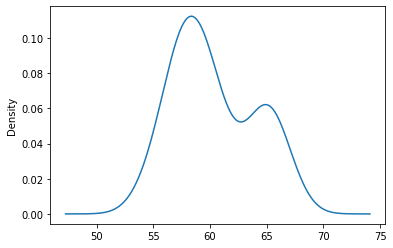

In [8]:
df['indeks_pendidikan'].plot.kde()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


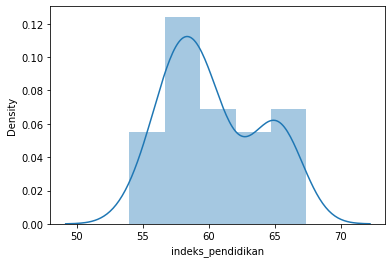

In [9]:
sns.distplot(df['indeks_pendidikan'])

Dapat terlihat di awal bahwa indeks pendidikan paling banyak berada di antara 55 dan 60

## Feature Engineering

**Encode nama tiap kabupaten/kota menjadi numerik**

In [10]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = preprocessing.LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [11]:
df_encode = Encoder(df[['kabupaten']])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Lakukan Standard Scaler pada fitur dan juga target**

In [12]:
#Preprocessing Feature
%time
from sklearn.preprocessing import StandardScaler
scaler_fitur = StandardScaler()
columnscale= [
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
#scaler.fit(df[columnscale])
#scaler.transform(df[columnscale])
df_fitur = df[columnscale]
df_scaled_fitur = pd.DataFrame(scaler_fitur.fit_transform(df_fitur),columns = df_fitur.columns)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [13]:
df_scaled_fitur.head(5)

,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601


In [14]:
#Preprocessing target
from sklearn.preprocessing import StandardScaler
scaler_target = StandardScaler()
columnscale= [ 'indeks_pendidikan']
df_target = df[columnscale]
df_scaled_target = pd.DataFrame(scaler_target.fit_transform(df_target),columns = df_target.columns)

In [15]:
df_scaled_target.head(5)

,indeks_pendidikan
0,0.552535
1,-0.842796
2,-1.077710
3,1.189349
4,-0.692791


In [16]:
df_scaled = df_scaled_target.join(df_scaled_fitur)
df_scaled.head(10)

,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


In [17]:
df_ready = df_encode.join(df_scaled)

In [18]:
df_ready.head(10)

,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,3,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,14,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,5,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,0,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,7,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,16,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,4,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,10,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,6,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,11,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


# Modelling

## Read Data

In [19]:
def read_data(df):
    trainFeat= [ 'kabupaten',
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

    y = df['indeks_pendidikan'] #Target
    X = df[trainFeat] #Features
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=25)

    return x_train, y_train, x_valid, y_valid, x_test


In [20]:
x_train, y_train, x_valid, y_valid, x_test = read_data(df_ready)

In [21]:
x_train.head(10)

,kabupaten,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
7,10,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
15,2,-0.202616,-1.029104,-0.047539,1.253914,1.669345,0.092727,0.638476,1.070355,-0.242622,1.080325,0.947162,1.671512,0.510578,1.664120,1.269688,0.817832,1.707433
8,6,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
27,11,0.991972,0.934089,0.731242,-0.610559,-0.288294,-0.645366,-0.801324,-0.963893,-0.915999,-0.517925,-0.818037,-0.803219,-0.803983,-1.261974,-1.101554,-0.488921,1.209917
20,5,0.601348,0.524589,0.558180,0.261984,-1.139831,0.747448,0.722411,0.628127,0.987024,0.718793,0.475708,0.026990,0.742285,1.065881,1.126310,0.529115,-0.211293
22,7,0.213805,1.235192,0.976414,0.212742,-0.779497,1.514967,1.058149,1.335691,0.855276,0.991665,0.856074,0.959905,0.895510,1.239552,1.142707,0.423037,-1.279563
6,4,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
53,17,-3.367546,-2.438266,-1.907961,-1.564754,0.568621,-2.084771,-1.369496,-1.339786,-1.486906,-1.958822,-1.781965,-1.643209,-1.816766,-3.252145,-3.512353,-3.263548,-0.463948
16,1,-0.989296,-1.366339,-1.749320,-0.438825,0.043357,-0.557089,-0.439760,-0.101549,-1.296604,-0.479419,-0.388624,-0.128292,-0.794640,0.159115,0.118501,0.740373,-0.741260
40,7,0.190966,1.054530,0.702399,0.286678,-0.713167,1.524775,1.129171,1.357803,0.855276,0.782971,0.856575,0.988027,0.792737,0.847473,0.622759,0.143342,-1.111934


In [22]:
y_train.head(10)

7    -0.596562
15    1.551626
8    -1.117334
27   -0.605052
20   -0.871099
22   -0.613543
6     1.025193
53    1.611062
16   -0.030504
40   -0.508823
Name: indeks_pendidikan, dtype: float64

In [23]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = metrics.mean_absolute_percentage_error(true, predicted)
    exp_var = metrics.explained_variance_score(true, predicted)
    return mae, mse, rmse, r2_square, mape, exp_var

## Model Lasso

In [24]:
%%time
lasso = Lasso(random_state=42, selection='random')

param_lasso = {'alpha': np.random.uniform(0.01,1,10),
                'selection': ['cyclic','random']}

lasso_cv = RandomizedSearchCV(lasso,
                        param_distributions = param_lasso,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
lasso_cv.fit(x_train,y_train)

CPU times: user 244 ms, sys: 2.74 ms, total: 247 ms
Wall time: 258 ms


RandomizedSearchCV(cv=5, estimator=Lasso(random_state=42, selection='random'),
                   param_distributions={'alpha': array([0.27198354, 0.2923444 , 0.69628616, 0.04079101, 0.87952447,
       0.73744163, 0.68886351, 0.10906861, 0.74345937, 0.09677343]),
                                        'selection': ['cyclic', 'random']},
                   scoring='neg_mean_squared_error')

In [25]:
print("Tuned hyperparameters : {}".format(lasso_cv.best_params_))
print("Best rmse: {}".format(lasso_cv.best_score_))
print("Best Estimator: {}".format(lasso_cv.best_estimator_))

Tuned hyperparameters : {'selection': 'cyclic', 'alpha': 0.09677343382168044}
Best rmse: -0.540656340659543
Best Estimator: Lasso(alpha=0.09677343382168044, random_state=42)


In [26]:
metrics_lasso = evaluate(y_valid, lasso_cv.predict(x_valid))
print( "metrics score untuk Lasso: ", metrics_lasso)

metrics score untuk Lasso:  (0.764852410640591, 0.8348281473178458, 0.9136893056821043, 0.20626532506903394, 0.7193927163053923, 0.4872845011966904)


## Model Random Forest Regressor

In [27]:
%%time
rf = RandomForestRegressor(random_state=0, n_jobs=-1)

param_rf = {"n_estimators": [100, 250, 500, 1000]}

rf_cv = RandomizedSearchCV(rf,
                        param_distributions = param_rf,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
rf_cv.fit(x_train,y_train)

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 8.23 s, sys: 399 ms, total: 8.63 s
Wall time: 18.8 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'n_estimators': [100, 250, 500, 1000]},
                   scoring='neg_mean_squared_error')

In [28]:
print("Tuned hyperparameters : {}".format(rf_cv.best_params_))
print("Best rmse: {}".format(rf_cv.best_score_))
print("Best Estimator: {}".format(rf_cv.best_estimator_))

Tuned hyperparameters : {'n_estimators': 500}
Best rmse: -0.4632842859139578
Best Estimator: RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)


In [29]:
metrics_rf = evaluate(y_valid, rf_cv.predict(x_valid))
print( "metrics score untuk random forest Regression: ", metrics_rf)

metrics score untuk random forest Regression:  (0.7521776063761574, 0.6373080090892711, 0.7983157327081003, 0.39406275764588106, 0.8430889489690598, 0.49217403524558023)


## Model Support Vector Regression

In [30]:
%%time
svr = LinearSVR(loss = 'squared_epsilon_insensitive', dual=False, max_iter=10000)

param_svr = {'tol':[0.001, 0.01, 0.1, 1],
             'C': [0.1, 0.25, 0.5, 1, 1.25]}

svr_cv = RandomizedSearchCV(svr,
                        param_distributions = param_svr,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
svr_cv.fit(x_train,y_train)

CPU times: user 329 ms, sys: 1.71 ms, total: 331 ms
Wall time: 513 ms


RandomizedSearchCV(cv=5,
                   estimator=LinearSVR(dual=False,
                                       loss='squared_epsilon_insensitive',
                                       max_iter=10000),
                   param_distributions={'C': [0.1, 0.25, 0.5, 1, 1.25],
                                        'tol': [0.001, 0.01, 0.1, 1]},
                   scoring='neg_mean_squared_error')

In [31]:
print("Tuned hyperparameters : {}".format(svr_cv.best_params_))
print("Best rmse: {}".format(svr_cv.best_score_))
print("Best Estimator: {}".format(svr_cv.best_estimator_))

Tuned hyperparameters : {'tol': 0.001, 'C': 0.1}
Best rmse: -0.5456388856769266
Best Estimator: LinearSVR(C=0.1, dual=False, loss='squared_epsilon_insensitive', max_iter=10000,
          tol=0.001)


In [32]:
metrics_svr = evaluate(y_valid, svr_cv.predict(x_valid))
print( "metrics score untuk Support Vector Regression: ", metrics_svr)

metrics score untuk Support Vector Regression:  (0.7602966980291883, 0.8257441652392128, 0.9087046633748573, 0.21490215839266813, 0.7795332706083364, 0.6290716686796453)


## Model Gradient Boosting Regressor

In [33]:
%%time
GBR = GradientBoostingRegressor(min_samples_leaf = 4,
                                     min_samples_split = 10,
                                     max_features = 7,
                                     max_depth = 50,
                                     n_estimators = 500,
                                     subsample = 0.2,
                                     random_state = 0)

param_GBR = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}

GBR_cv = RandomizedSearchCV(GBR,
                        param_distributions = param_GBR,
                        scoring='neg_mean_squared_error',
                        cv=5
                        )
GBR_cv.fit(x_train,y_train)

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


CPU times: user 9.78 s, sys: 26.5 ms, total: 9.8 s
Wall time: 13.3 s


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(max_depth=50,
                                                       max_features=7,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10,
                                                       n_estimators=500,
                                                       random_state=0,
                                                       subsample=0.2),
                   param_distributions={'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile']},
                   scoring='neg_mean_squared_error')

In [34]:
print("Tuned hyperparameters : {}".format(GBR_cv.best_params_))
print("Best rmse: {}".format(GBR_cv.best_score_))
print("Best Estimator: {}".format(GBR_cv.best_estimator_))

Tuned hyperparameters : {'loss': 'squared_error'}
Best rmse: -1.0105916379122282
Best Estimator: GradientBoostingRegressor(max_depth=50, max_features=7, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=500,
                          random_state=0, subsample=0.2)


In [35]:
metrics_GBR = evaluate(y_valid, GBR_cv.predict(x_valid))
print( "metrics score untuk Gradient Boosting Regression: ", metrics_GBR)

metrics score untuk Gradient Boosting Regression:  (1.1743504710320225, 1.6333144551356331, 1.2780119150992424, -0.5529163963532984, 1.0687822544992247, 2.220446049250313e-16)


## Perbandingan Semua Model

In [36]:
Perbandingan_rmse= pd.DataFrame ({'Mean Absolut Error': [metrics_lasso[0],metrics_rf[0],metrics_svr[0],metrics_GBR[0]],
                                  'Mean Squared Error': [metrics_lasso[1],metrics_rf[1],metrics_svr[1],metrics_GBR[1]],
                                  'Root Mean Squared Error': [metrics_lasso[2],metrics_rf[2],metrics_svr[2],metrics_GBR[2]],
                                  'R2(Coef of determination)': [metrics_lasso[3],metrics_rf[3],metrics_svr[3],metrics_GBR[3]],
                                  'Mean Absolute Percentage Error': [metrics_lasso[4],metrics_rf[4],metrics_svr[4],metrics_GBR[4]],
                                  'Mean Absolute Percentage Error': [metrics_lasso[4],metrics_rf[4],metrics_svr[4],metrics_GBR[4]],
                                  'Variance Score' : [metrics_lasso[5],metrics_rf[5],metrics_svr[5],metrics_GBR[5]]
                            }, index=['Model Lasso','Model Random Forest Regression','Model Support Vector Regression','Model Gradient Boosting Regression'])
Perbandingan_rmse

,Mean Absolut Error,Mean Squared Error,Root Mean Squared Error,R2(Coef of determination),Mean Absolute Percentage Error,Variance Score
Model Lasso,0.764852,0.834828,0.913689,0.206265,0.719393,4.872845e-01
Model Random Forest Regression,0.752178,0.637308,0.798316,0.394063,0.843089,4.921740e-01
Model Support Vector Regression,0.760297,0.825744,0.908705,0.214902,0.779533,6.290717e-01
Model Gradient Boosting Regression,1.174350,1.633314,1.278012,-0.552916,1.068782,2.220446e-16


Maka model yang akan digunakan adalah **Random Forest Regression** karena mempunyai nilai RMSE yang paling rendah

## Feature Importance

Untuk mengetahui fitur apa yang paling berpengaruh pada indeks pendidikan

Gunakan Best Model yaitu Random Forest Regression

In [37]:
randomforest = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

randomforest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [38]:
randomforest.feature_importances_

array([0.04307007, 0.0625958 , 0.51986761, 0.05383188, 0.02423926,
       0.05958429, 0.02958923, 0.00671789, 0.00626502, 0.0062285 ,
       0.02635228, 0.02028995, 0.00624313, 0.01242051, 0.02734474,
       0.02084803, 0.05165404, 0.02285777])

In [39]:
x_train.columns

Index(['kabupaten', 'status_kegiatan_buta_aksara', 'ketersediaan_pkbm',
       'ketersediaan_tbm', 'jumlah_angkatan_kerja', 'kepadatan_penduduk',
       'Jumlah SD', 'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)'],
      dtype='object')

Text(0.5, 0, 'Random Forest Feature Importance')

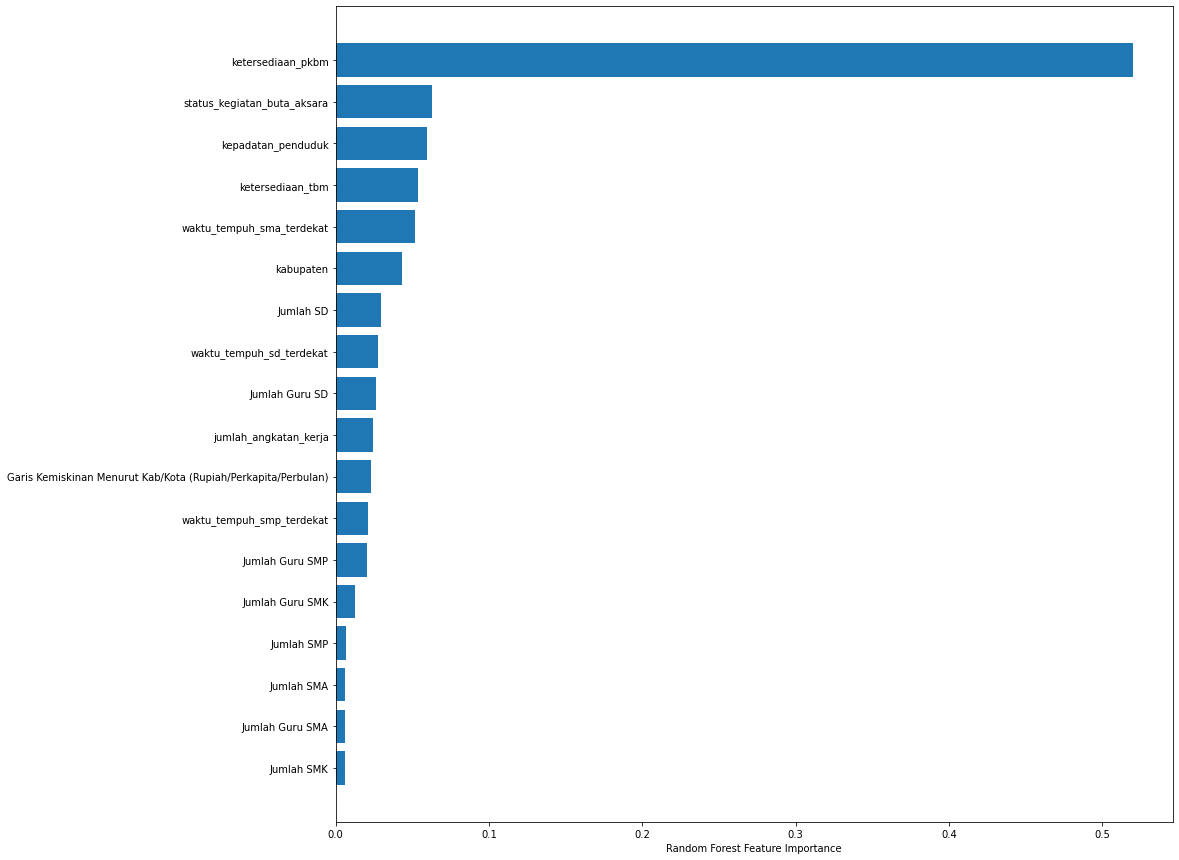

In [40]:
sorted_idx = randomforest.feature_importances_.argsort()
plt.figure(figsize=(15,15))
plt.barh(x_train.columns[sorted_idx], randomforest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [41]:
explainer = shap.TreeExplainer(randomforest)
shap_values = explainer.shap_values(x_test)

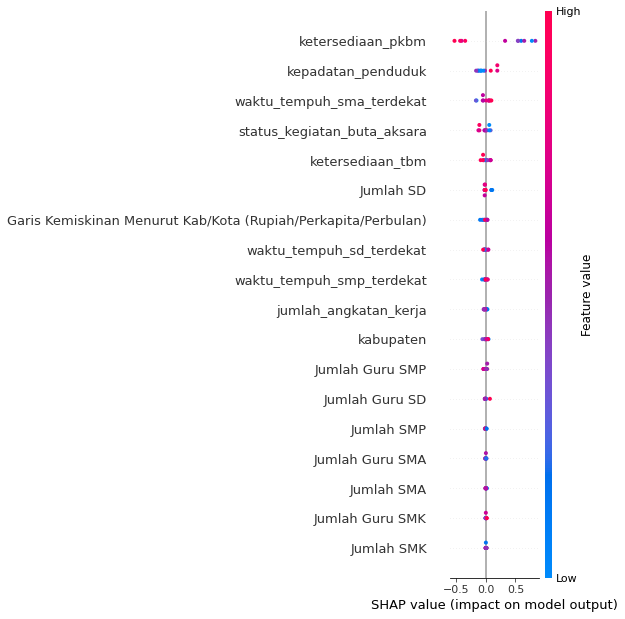

In [42]:
shap.summary_plot(shap_values, x_test)

Dapat diketahui bahwa **FITUR** yang paling berpengaruh pada **INDEKS PENDIDIKAN** adalah  **Ketersediaan Pusat Kegiatan Belajar**

Diikuti oleh kepadatan penduduk dan ketersediaan perpustakaan

### Sanity Check dengan model lain

Gunakan Support Vector untuk mengecek apakah memiliki trend yang sama

In [43]:
SupportVector = LinearSVR(C=0.25, loss = 'squared_epsilon_insensitive', dual=False, max_iter=10000)

In [44]:
SupportVector.fit(x_train,y_train)

LinearSVR(C=0.25, dual=False, loss='squared_epsilon_insensitive',
          max_iter=10000)

Feature: kabupaten Score: 0.04576111280393061
Feature: status_kegiatan_buta_aksara Score: -0.10865424373156977
Feature: ketersediaan_pkbm Score: -0.5295398618035241
Feature: ketersediaan_tbm Score: 0.09541512819147008
Feature: jumlah_angkatan_kerja Score: 0.1226355773494137
Feature: kepadatan_penduduk Score: 0.2657265281005621
Feature: Jumlah SD Score: -0.20587012459046314
Feature: Jumlah SMP Score: -0.11504532878957145
Feature: Jumlah SMA Score: 0.004630275280046138
Feature: Jumlah SMK Score: -0.13562578350145843
Feature: Jumlah Guru SD Score: 0.29935284696526837
Feature: Jumlah Guru SMP Score: -0.04698810957751927
Feature: Jumlah Guru SMA Score: 0.27604094046392713
Feature: Jumlah Guru SMK Score: -0.2846263103447089
Feature: waktu_tempuh_sd_terdekat Score: -0.043790866234100626
Feature: waktu_tempuh_smp_terdekat Score: 0.15147955251731168
Feature: waktu_tempuh_sma_terdekat Score: 0.20310940557210733
Feature: Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan) Score: -0.1220

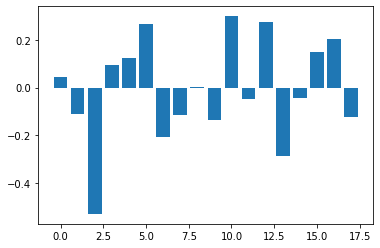

In [45]:
importance = SupportVector.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature:', x_train.columns[i] ,'Score:', v)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Dapat diketahui bahwa koefisien support vector yang paling berpengaruh pada **INDEKS PENDIDIKAN** adalah ketersediaan_pkbm atau **Ketersediaan Pusat Kegiatan Belajar**

Cocok dengan model awal yaitu Random Forest Regression

### Cek pengaruh positif/negatif dari Fitur paling berpengaruh

In [46]:
#Loaddataset
cek_data = df_ready

In [47]:
df_ready.head(10)

,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,3,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,14,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,5,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,0,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,7,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,16,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,4,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,10,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,6,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,11,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


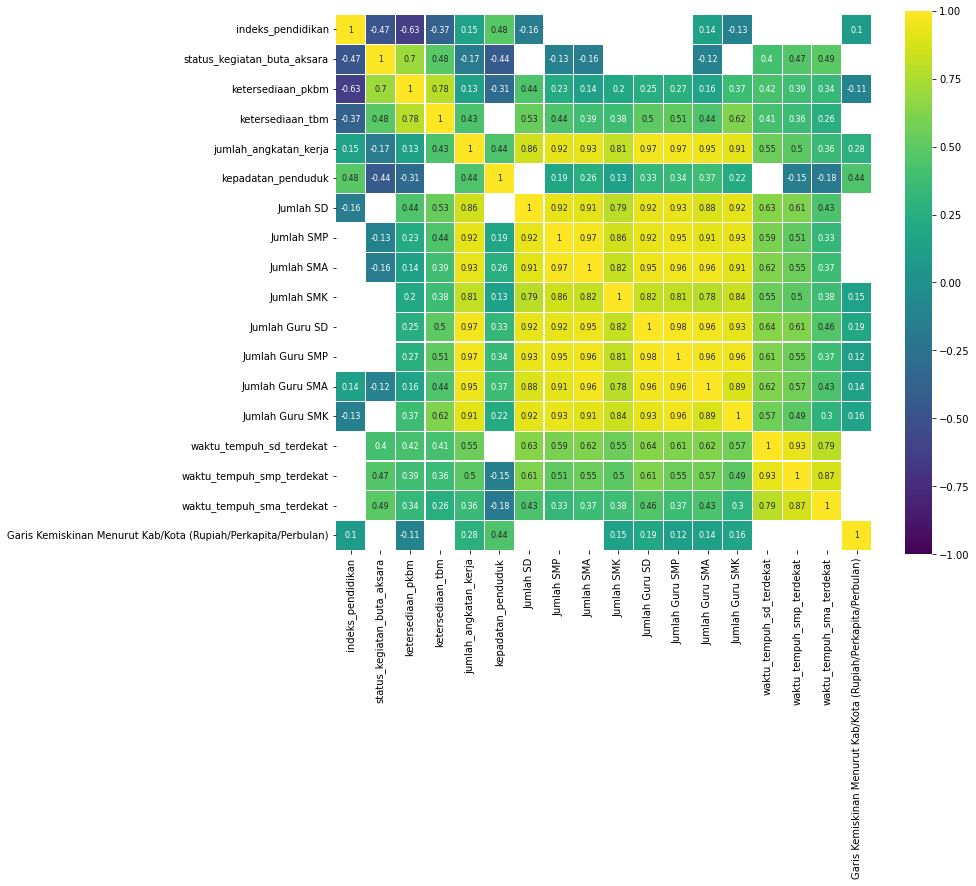

In [48]:
cols= ['indeks_pendidikan',
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
corr = cek_data[cols].corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

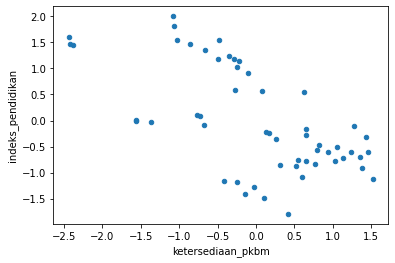

In [49]:
cek_data.plot(kind='scatter', x='ketersediaan_pkbm', y='indeks_pendidikan')

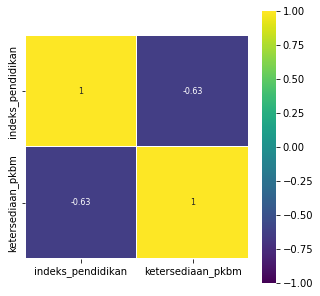

In [50]:
cols_1= [
       'indeks_pendidikan', 'ketersediaan_pkbm']
corr = cek_data[cols_1].corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Terlihat memang terdapat trend ketersediaan pusat kegiatan belajar terhadap nilai indeks pendidikan, namun korelasi yang negatif menandakan bahwa semakin **meningkatnya jumlah pusat kegiatan belajar**, membuat **indeks pendidikan menurun**

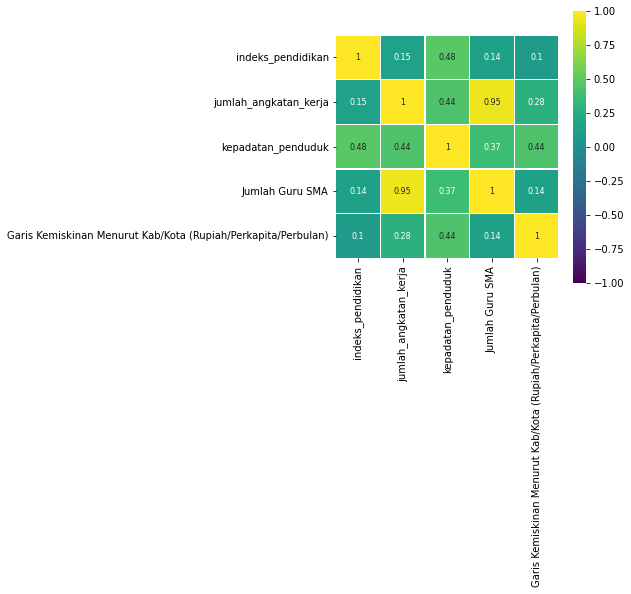

In [51]:
cols_2= ['indeks_pendidikan',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah Guru SMA', 
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']
corr = cek_data[cols_2].corr()
plt.figure(figsize=(5, 5))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

Sedangkan terdapat korelasi yang **positif** antara **indeks pendidikan** terhadap **kepadatan penduduk, Jumlah angkatan Kerja, Jumlah Guru SMA, dan Garis kemiskinan (rupiah/perkapita/perbulan)**

### Cek Ulang dengan menggabungkan beberapa fitur yang berkorelasi tinggi

In [52]:
#Loaddataset
cek_ulang = df_ready

In [53]:
cek_ulang.head(10)

,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,3,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,2.174592,2.917622,2.596040,0.606419,2.305396,2.725874,2.531066,2.680026,0.885665,0.406165,0.065355,-0.174674
1,14,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,0.673884,0.593281,0.274345,0.943108,0.016647,0.224466,0.196944,-0.218177,1.302698,1.256424,1.079329,-1.292833
2,5,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,0.784230,0.489977,0.583904,0.299008,0.546941,0.426160,0.083234,0.665672,1.024091,1.293631,0.748081,-0.576422
3,0,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,1.152051,0.541629,0.937686,0.884553,1.310174,1.301503,1.489331,0.496564,0.042420,0.475415,0.994145,-0.673776
4,7,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.588531,0.922563,1.291469,0.255092,0.723072,0.902118,1.475881,1.068356,1.256190,0.977510,0.354004,-1.440601
5,16,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.367367,0.134869,0.031120,-0.725697,-0.200129,0.137883,-0.152746,0.297558,0.268992,0.167689,0.157892,-1.254959
6,4,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.468812,-0.756128,-0.853336,-1.091663,-0.683122,-0.652378,-0.617370,-0.798378,-0.206310,-0.354537,-0.557997,-0.349905
7,10,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,-0.696861,-0.872345,-0.831224,-0.154790,-0.671237,-0.606834,-0.364272,-0.506876,0.295929,0.069989,0.795253,-0.750537
8,6,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,-0.037236,-0.329999,-0.411108,-0.915999,-0.009024,0.423658,-0.106284,0.348010,0.201752,-0.265250,-1.071365,-0.042618
9,11,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.660079,-0.865889,-0.963893,-0.418286,-0.692867,-0.689414,-0.654050,-0.684393,-0.824354,-0.607386,-0.187503,1.070119


Gabungkan Jumlah Sekolah dan jumlah guru

In [54]:
cek_ulang['Jumlah Sekolah']= cek_ulang['Jumlah SD']+cek_ulang['Jumlah SMP']+cek_ulang['Jumlah SMA']+cek_ulang['Jumlah SMK']

In [55]:
cek_ulang['Jumlah Guru']= cek_ulang['Jumlah Guru SD']+cek_ulang['Jumlah Guru SMP']+cek_ulang['Jumlah Guru SMA']+cek_ulang['Jumlah Guru SMK']

In [56]:
dropcol = [ 'Jumlah SD',
       'Jumlah SMP', 'Jumlah SMA', 'Jumlah SMK', 'Jumlah Guru SD',
       'Jumlah Guru SMP', 'Jumlah Guru SMA', 'Jumlah Guru SMK',]

In [57]:
cek_ulang.drop(dropcol, axis=1,inplace=True)

In [58]:
cek_ulang.head(10)

,kabupaten,indeks_pendidikan,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan),Jumlah Sekolah,Jumlah Guru
0,3,0.552535,-0.871350,0.620942,2.389758,2.950581,0.873382,0.885665,0.406165,0.065355,-0.174674,8.294674,10.242362
1,14,-0.842796,0.198639,0.765471,-0.422508,0.153366,-1.134453,1.302698,1.256424,1.079329,-1.292833,2.484618,0.219881
2,5,-1.077710,0.438382,0.596853,0.875461,0.087194,-1.175686,1.024091,1.293631,0.748081,-0.576422,2.157119,1.722007
3,0,1.189349,-0.416282,-0.499162,-0.307133,1.267355,1.366377,0.042420,0.475415,0.994145,-0.673776,3.515919,4.597572
4,7,-0.692791,0.670573,1.355633,1.452336,0.210886,-0.913950,1.256190,0.977510,0.354004,-1.440601,4.057654,4.169428
5,16,-0.463538,1.246479,0.825692,0.298586,-0.270346,-0.983866,0.268992,0.167689,0.157892,-1.254959,-0.192342,0.082565
6,4,1.025193,0.065709,-0.246235,-0.364820,-0.676645,-0.657593,-0.206310,-0.354537,-0.557997,-0.349905,-3.169939,-2.751247
7,10,-0.596562,1.481559,1.451986,1.351383,-0.882294,-0.356417,0.295929,0.069989,0.795253,-0.750537,-2.555221,-2.149219
8,6,-1.117334,0.593965,1.524251,1.668664,0.059983,1.741053,0.201752,-0.265250,-1.071365,-0.042618,-1.694343,0.656360
9,11,-0.783360,1.283335,1.030442,1.697508,-0.671662,-0.299051,-0.824354,-0.607386,-0.187503,1.070119,-2.908146,-2.720724


In [59]:
def read_data_cek(df):
    trainFeat= [ 'kabupaten',
       'status_kegiatan_buta_aksara', 'ketersediaan_pkbm', 'ketersediaan_tbm',
       'jumlah_angkatan_kerja', 'kepadatan_penduduk', 'Jumlah Sekolah', 'Jumlah Guru',
       'waktu_tempuh_sd_terdekat', 'waktu_tempuh_smp_terdekat',
       'waktu_tempuh_sma_terdekat',
       'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

    y = df['indeks_pendidikan'] #Target
    X = df[trainFeat] #Features
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=25)

    return x_train, y_train, x_valid, y_valid, x_test


In [60]:
x_train_cek, y_train_cek, x_valid_cek, y_valid_cek, x_test_cek = read_data_cek(cek_ulang)

In [61]:
randomforest_cek = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

randomforest_cek.fit(x_train_cek,y_train_cek)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [62]:
randomforest_cek.feature_importances_

array([0.06410671, 0.06268624, 0.52390936, 0.05187811, 0.05837564,
       0.06921951, 0.00712737, 0.02660693, 0.02029059, 0.03797752,
       0.05138515, 0.02643687])

Text(0.5, 0, 'Random Forest Feature Importance')

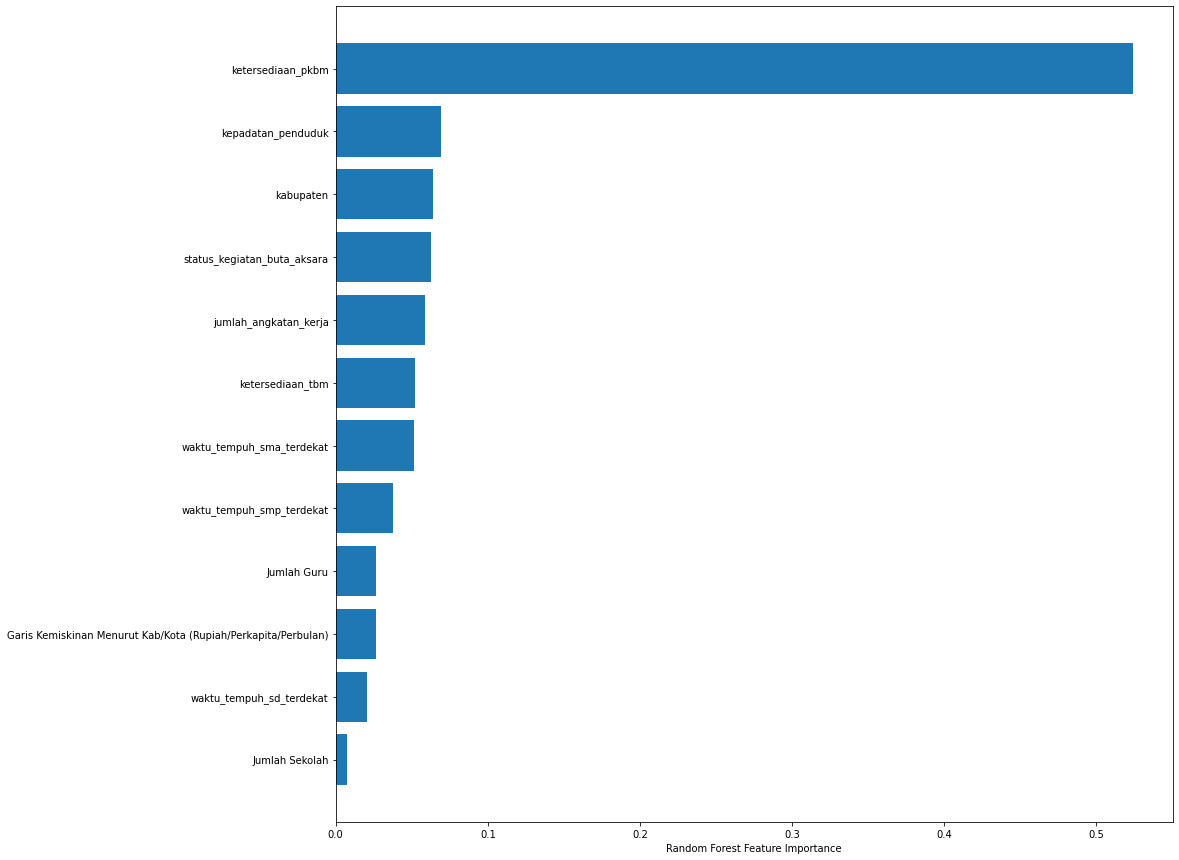

In [63]:
sorted_idx = randomforest_cek.feature_importances_.argsort()
plt.figure(figsize=(15,15))
plt.barh(x_train_cek.columns[sorted_idx], randomforest_cek.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

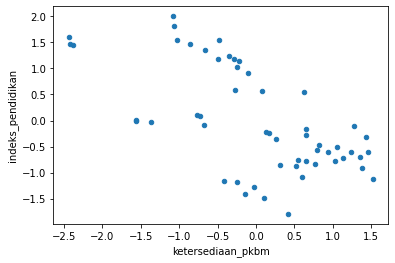

In [64]:
cek_ulang.plot(kind='scatter', x='ketersediaan_pkbm', y='indeks_pendidikan')

Dengan mengecek ulang melalui penggabungan fitur pun, jumlah kegiatan pusat belajar tetap menjadi fitur paling berpengaruh ke indeks pendidikan, namun mempunyai trend yang negatif

## Kesimpulan

Kesimpulan:

1. Model terbaik untuk prediksi ini adalah Random Forest Regressor dengan metrik RMSE 0.79 dan R2 Score 0.39. Metrik RMSE ini paling kecil dibandingkan dengan model Support Vector, Lasso, dan Gradient Boosting

2. Fitur paling berpengaruh adalah jumlah kegiatan pusat belajar namun korelasinya negatif, sehingga semakin banyak kegiatan pusat belajar, maka semakin turun nilai indeks pendidikan

3. Hipotesis yang dapat diambil adalah, dengan banyaknya kegiatan pusat belajar, maka siswa hanya mengandalkan ilmu yang didapat secara otodidak, bukan melalui instansi pendidikan seperti sekolah, untuk nantinya mempersiapkan diri bekerja

4. Fitur yang dapat sekiranya dapat dikontrol oleh pemerintah dan mempunyai dampak positif berdasarkan modelling ini adalah, dengan meningkatkan 
  a. Jumlah Angkatan Kerja (dengan menaikkan lapangan pekerjaan)
  b. Jumlah Guru SMA
  c. Menurunkan garis kemiskinan dengan menaikkan keekonomian masyarakat  (menaikkan nilai rupiah/kapita)


## Save Model

In [65]:
import pickle
modellist= [lasso_cv, rf_cv, svr_cv, GBR_cv]

In [66]:
pickle.dump(lasso_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/lasso_cv.pkl", 'wb'))
pickle.dump(rf_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/rf_cv.pkl", 'wb'))
pickle.dump(svr_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/svr_cv.pkl", 'wb'))
pickle.dump(GBR_cv, open("/content/drive/MyDrive/DatasetHackathon/Model/GBR_cv.pkl", 'wb'))

# Serving model

In [67]:
features= x_train.columns.to_list()
features

['kabupaten',
 'status_kegiatan_buta_aksara',
 'ketersediaan_pkbm',
 'ketersediaan_tbm',
 'jumlah_angkatan_kerja',
 'kepadatan_penduduk',
 'Jumlah SD',
 'Jumlah SMP',
 'Jumlah SMA',
 'Jumlah SMK',
 'Jumlah Guru SD',
 'Jumlah Guru SMP',
 'Jumlah Guru SMA',
 'Jumlah Guru SMK',
 'waktu_tempuh_sd_terdekat',
 'waktu_tempuh_smp_terdekat',
 'waktu_tempuh_sma_terdekat',
 'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

In [68]:
input_data = pd.DataFrame()
for i in features:
  print(i)

  if i =='kabupaten':
    print("Input kode kabupaten/kota")
  if i =='status_kegiatan_buta_aksara':
    print("Input berapa persen tiap kabupaten/kota(dalam bentuk desimal)")
  if i =='ketersediaan_pkbm':
    print("Input jumlah ketersediaan pusat kegiatan belajar di kabupaten/kota")
  if i =='ketersediaan_tbm':
    print("Input jumlah perpustakaan di kabupaten/kota")
  if i =='jumlah_angkatan_kerja':
    print("Input jumlah angkatan kerja di kabupaten/kota")
  if i =='kepadatan_penduduk':
    print("Input kepadatan penduduk di kabupaten/kota")
  if i =='Jumlah SD':
    print("Input jumlah sd di kabupaten/kota")
  if i =='Jumlah SMP':
    print("Input jumlah smp di kabupaten/kota")
  if i =='Jumlah SMA':
    print("Input jumlah sma di kabupaten/kota")
  if i =='Jumlah SMK':
    print("Input jumlah smk di kabupaten/kota")
  if i =='Jumlah Guru SD':
    print("Input jumlah guru sd di kabupaten/kota")
  if i =='Jumlah Guru SMP':
    print("Input jumlah guru smp di kabupaten/kota")  
  if i =='Jumlah Guru SMA':
    print("Input jumlah guru sma di kabupaten/kota")
  if i =='Jumlah Guru SMK':
    print("Input jumlah guru smk di kabupaten/kota")
  if i =='waktu_tempuh_sd_terdekat':
    print("Input waktu tempuh sd di kabupaten/kota(dalam menit)")
  if i =='waktu_tempuh_smp_terdekat':
    print("Input waktu tempuh smp di kabupaten/kota(dalam menit)")
  if i =='waktu_tempuh_sma_terdekat':
    print("Input waktu tempuh sma di kabupaten/kota(dalam menit)")
  if i =='Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)':
    print("Input nilai Rupiah/Perkapita/Perbulan di kabupaten/kota")
  number = float(input("Enter your value: "))
  
  if number < 0 :
    print("Please input non-negative value ")
    break
  else:
    pass
  x=' '
  print(x)
  column_name = i
  #input_data.insert(loc=0, column= i, value=[number])
  input_data.loc[0, column_name] = number

kabupaten
Input kode kabupaten/kota
Enter your value: 10
 
status_kegiatan_buta_aksara
Input berapa persen tiap kabupaten/kota(dalam bentuk desimal)
Enter your value: 0.8
 
ketersediaan_pkbm
Input jumlah ketersediaan pusat kegiatan belajar di kabupaten/kota
Enter your value: 2000
 
ketersediaan_tbm
Input jumlah perpustakaan di kabupaten/kota
Enter your value: 3000
 
jumlah_angkatan_kerja
Input jumlah angkatan kerja di kabupaten/kota
Enter your value: 200000
 
kepadatan_penduduk
Input kepadatan penduduk di kabupaten/kota
Enter your value: 2000
 
Jumlah SD
Input jumlah sd di kabupaten/kota
Enter your value: 1000
 
Jumlah SMP
Input jumlah smp di kabupaten/kota
Enter your value: 1250
 
Jumlah SMA
Input jumlah sma di kabupaten/kota
Enter your value: 1500
 
Jumlah SMK
Input jumlah smk di kabupaten/kota
Enter your value: 1000
 
Jumlah Guru SD
Input jumlah guru sd di kabupaten/kota
Enter your value: 2000
 
Jumlah Guru SMP
Input jumlah guru smp di kabupaten/kota
Enter your value: 2500
 
Jumlah 

In [69]:
input_data

,kabupaten,status_kegiatan_buta_aksara,ketersediaan_pkbm,ketersediaan_tbm,jumlah_angkatan_kerja,kepadatan_penduduk,Jumlah SD,Jumlah SMP,Jumlah SMA,Jumlah SMK,Jumlah Guru SD,Jumlah Guru SMP,Jumlah Guru SMA,Jumlah Guru SMK,waktu_tempuh_sd_terdekat,waktu_tempuh_smp_terdekat,waktu_tempuh_sma_terdekat,Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)
0,10.0,0.8,2000.0,3000.0,200000.0,2000.0,1000.0,1250.0,1500.0,1000.0,2000.0,2500.0,3000.0,1500.0,10.0,5.0,5.0,400000.0


In [70]:
input_data = input_data.transpose().reindex(features).transpose()

In [71]:
cols= [
 'status_kegiatan_buta_aksara',
 'ketersediaan_pkbm',
 'ketersediaan_tbm',
 'jumlah_angkatan_kerja',
 'kepadatan_penduduk',
 'Jumlah SD',
 'Jumlah SMP',
 'Jumlah SMA',
 'Jumlah SMK',
 'Jumlah Guru SD',
 'Jumlah Guru SMP',
 'Jumlah Guru SMA',
 'Jumlah Guru SMK',
 'waktu_tempuh_sd_terdekat',
 'waktu_tempuh_smp_terdekat',
 'waktu_tempuh_sma_terdekat',
 'Garis Kemiskinan Menurut Kab/Kota (Rupiah/Perkapita/Perbulan)']

In [72]:
inputdata = pd.DataFrame(scaler_fitur.transform(input_data[cols]),columns = cols)

In [73]:
inputdata = input_data[['kabupaten']].join(inputdata)

In [74]:
#Prediction:
result_prediction= rf_cv.predict(inputdata)
data_hasil =pd.DataFrame(result_prediction,columns= ['indeks_pendidikan'])
inversed_result = scaler_target.inverse_transform(data_hasil)
print("Hasil prediksi nilai indeks pendidikan berdasarkan kondisi anda", inversed_result )

Hasil prediksi nilai indeks pendidikan berdasarkan kondisi anda [[57.11368]]
